NOTE: CoLab usually autosaves your work, but just to be safe, make sure to save it manually too!


***Double click*** and enter your name here!

Name: Qianwen Luo

# Lab 6: Epidemics on a Network
Welcome to Lab 6. Blah blah blah coding problems blah blah blah conceptual problem blah blah blah project interest form blah blah blah anonymous course feedback form. You get the picture.

## Basic Coding Exercises
### Problem 1: Epic Rap Battles of History — Watts-Strogatz vs. Barabasi-Albert (7 points + 2 extra credit points)
**1.A** (5 points + 2 extra credit points) In the text block below, answer the following about BOTH Watts-Strogatz and Barabasi-Albert graphs (Lecture 9, Slides 21 and 22):


*   This graph is an example of what type of network? Random, small-world, or scale-free?
*   What is the algorithmic procedure used to generate this graph?
*   What manner of real-world process could this graph help us model?
*   What about this graph makes it well suited to modeling this real-world process?

>To help guide your answer to the final question, think about which graph would be more helpful in modeling personal connections between the citizens of a country, and which would be more helpful in modeling follow networks on Twitter. Then, try to generalize this idea or come up with more examples for which these graph types would be useful.

You will get 2 extra credit points if you format your answer as a rap battle. Have fun, but remember you will still be graded for demonstrated understanding of course content. Obviously no profanity is allowed.

You are free to give a traditional response in addition to your rap response, but this is not required.

***Double click*** and write down your response here!

Watts-Strogatz graph, a small world surprise,

Start with a k neighbors ring, with prob p, random connections that rise,

Rewire a few edges, the network's spark,

Model social and neuron networks, with clustering hitting the mark.

Short path length and high clustering come together,

Greater chance of one node's neighbor being neighbors of each other.

small world phenomenon, people close and tight,

short distance between them, like day and night.





Barabasi-Albert graph, it's a scale-free scene,

Start small, then nodes come to attach and lean,  

See hubs from natually, adding nodes with probability proportional to their current degree,

Model internet and citation networkds, observe Twitter's tweet spree,


Power law distribution, in the world of networks, their roles so vast,

straight line on loglog plot, it's a fact, they're unsurpassed,

Few nodes with lots of links, while others sit back,

The great gets greater, that's the main catch.  


Lucky for us, ```networkx``` can create many graph types for us, including Watts-Strogatz and Barabasi-Albert.

*Watts-Strogatz*

```nx.watts_strogatz_graph()``` takes 3 arguments: the number of nodes, the number of connected neighbors (in the initial k-neighbor ring), and the rewiring probability for edges in the ring network. If you're confused about what these parameters mean, see Lecture 9, Side 21.

*Barabasi-Albert*

```nx.barabasi_albert_graph()``` takes 2 arguments: the number of nodes and the number of initial connections that each new node has when generated.

**1.B** (2 points) In the two codeblocks below, create a Basabasi-Albert graph and a Watts-Strogatz graph using whatever parameters you want. Then, visualize them one at a time using the ```nx.draw_circular()``` function
>OPTIONAL: Visualizing two network figures at once requires the matplotlib command ```plt.figure()```, if you want to try it out. An example can be found in Lab 5, Problem 5A.

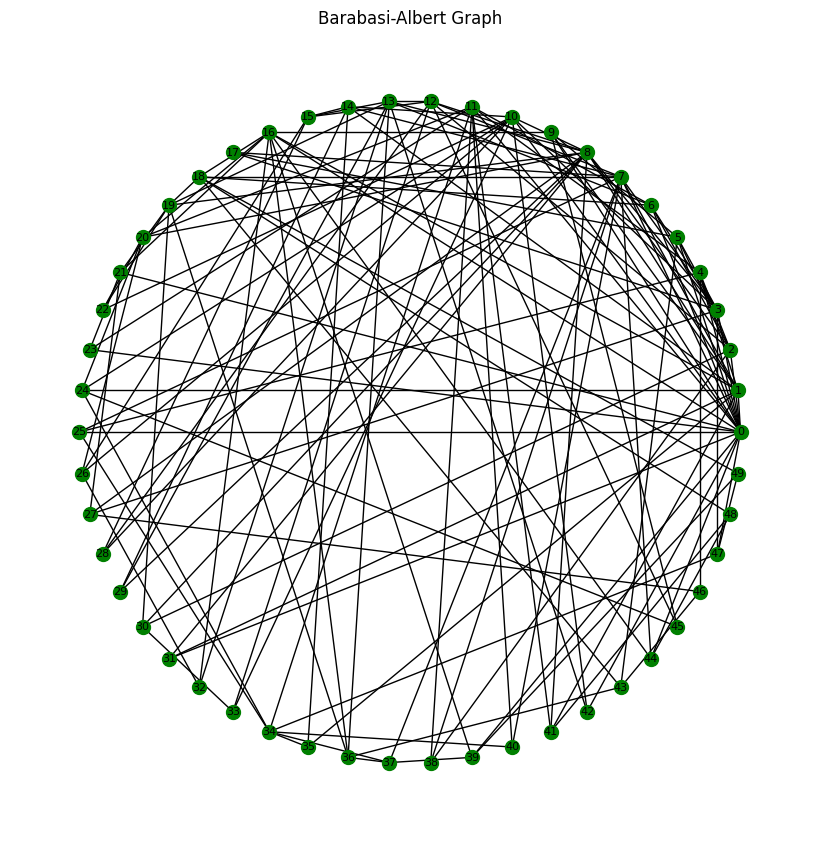

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
# <-- Create a graph using the Barabasi-Albert algorithm and visualize it here
ba_graph = nx.barabasi_albert_graph(50, 3)

plt.figure(figsize=(8, 8))
nx.draw_circular(ba_graph, with_labels=True, node_size=100, node_color='green', font_size=8)
plt.title("Barabasi-Albert Graph")
plt.show()

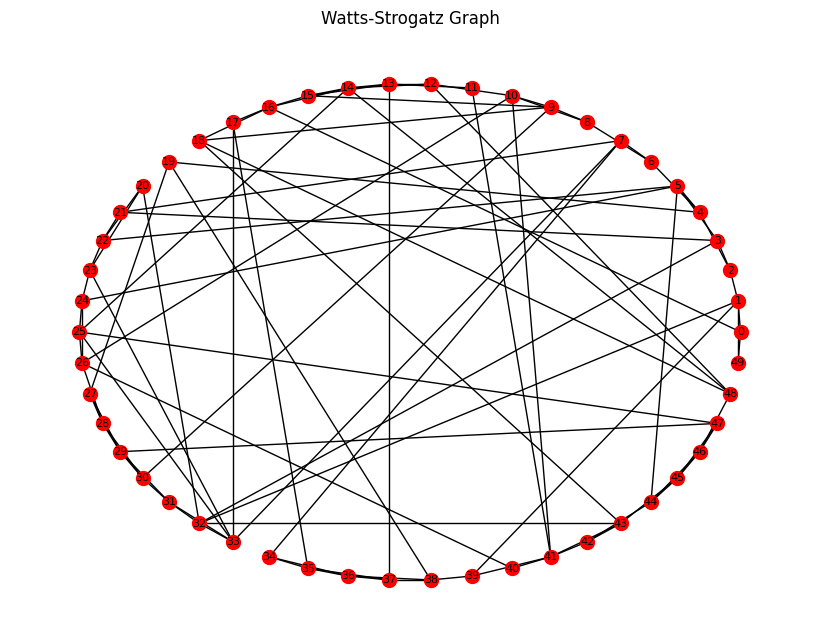

In [31]:
# <-- Create a graph using the Watts-Strogatz algorithm and visualize it here
ws_graph = nx.watts_strogatz_graph(50, 4, 0.4)

plt.figure(figsize=(8, 6))
nx.draw_circular(ws_graph, with_labels=True, node_size=100, node_color='red', font_size=8)
plt.title("Watts-Strogatz Graph")
plt.show()

## Epidemic Network Modeling Problems
Channel your inner epidemiologist.

### Problem 2: The SI (or SIS) Model (10 points)

Before we code up the SIR model that we learned in class, we'll start with the simpler SI model. The concept of immunity does not exist in the SI model. Therefore, agents can get infected again as soon as they recover. This may be applicable to some variants of the common cold.

**Rules:**

In this model, all agents start out as being susceptible to infection. For each infected neighbor, agents have a 10% chance of getting sick. That means that if an agent has 5 infected neighbors, they have 5 opportunities to get sick.

> Aside: In the case of 5 infected neighbors, the total works out to be ~40% chance of getting sick, but you need some fancy probability equations (namely the geometric probability mass function) to calculate that number precisely. We don't need to worry about this because these probabilities naturally arise from the algorithm that we'll write.

Once infected, agents have a 10% chance of recovery in each subsequent timestep.

We'll use 0 to indicate a susceptible agent, and 1 to indicate an infected agent.

**2.A** (2 points) Create the initial condition for the network that represents our world. We'll start out with a Watts-Strogatz small world network with 100 nodes, 4 initial ring neighbors, and a 25% chance of rewiring edges in the ring.

We'll give each node an attribute called state. The default value will be susceptible (0), but we'll need to make a patient 0 who is already infected (1).

In [32]:
import networkx as nx

def initializeSI():
    global current_world, next_world

    num_nodes = 100 # <-- How many nodes?

    # Initialize the current world
    current_world = nx.watts_strogatz_graph(num_nodes, 4, 0.25) # <-- input given parameters to create the watts-strogatz graph
    current_world.pos = nx.kamada_kawai_layout(current_world) # We'll use the kamada-kawai layout because it looks nice

    nx.set_node_attributes(current_world, 0, 'state')  # <-- make a new attribute called 'state'. The default state is susceptible (0)
    current_world.nodes[0]['state'] = 1  # <-- set node 0's state to infected (1)! This will be patient 0.

    # Initalize the next world
    next_world = current_world.copy()
    next_world.pos = current_world.pos

Time to make the ```updateSI()``` function, which updates every agent based on the rules.

**2.B** (2 points) Review the **Rules** section above and use it to complete the ```updateSI()``` function.

In [81]:
import random

def updateSI():
  global current_world, next_world

  next_world = current_world.copy()
  next_world.pos = current_world.pos

  # Loop through all of the nodes
  for current_node in current_world.nodes:

      # Rules for if the current_node is susceptible
      if current_world.nodes[current_node]['state'] == 0: # if susceptible

          # Loop through the neighbors of the susceptible node to see if they're infected
          for neighbor in current_world.neighbors(current_node):

              # For each infected neighbor, the current_node has a 10% chance of infection
              if current_world.nodes[neighbor]['state'] == 1: # <-- if the neighbor is infected
                  # infect the current_agent with a 10% chance
                  if random.random() < 0.1: # <-- infection probability
                      next_world.nodes[current_node]['state'] = 1 # <-- infect the current_agent

                      # If the current node already got infected, we don't need to loop through the neighbors anymore (break the loop)
                      break

      # Rules for if the current_node is infected
      elif current_world.nodes[current_node]['state'] == 1: # <-- if infected
          if random.random() < 0.1: # <-- Recovery probability
            # Recovered agents immediately become suseptible again
            next_world.nodes[current_node]['state'] = 0 # <--

  # Set current_world to next_world to iterate one timestep
  current_world = next_world.copy()
  current_world.pos = next_world.pos

Because we haven't had a lecture on ```matplotlib```, I've written the ```observeSI()``` function for you. This function allows us to visualize both our network and a line graph of how our quantities change over time. If you're interested in understanding how it works, I've commented it thoroughly. Otherwise, you can just run it and move on.

In [69]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Make a custom colormap. We'll use "yellow" for susceptible (0) and "red" for infected (1). Recall that you must pass the colors as strings.
colorMap = ListedColormap(["yellow", "red"])

def observeSI():
    global current_world, next_world

    # Count the number of susceptible and infected agents at this timestep
    suscep_count = 0
    infected_count = 0

    # Make a list of states so we can set the color
    state_list = []

    for current_node in current_world.nodes:
      # Get the state of the current node
      current_node_state = current_world.nodes[current_node]['state']

      # Add it to the list of states
      state_list.append(current_node_state)

      # Count the quantities (S and I)
      if current_node_state == 0:
        suscep_count += 1
      elif current_node_state == 1:
        infected_count += 1

    # Maintain the data lists
    suscep_data.append(suscep_count)
    infected_data.append(infected_count)

    # Make subplots, this allows us to plot two figures at once (height ratio of 3 to 1)
    fig, axes = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]})
    ax = axes.flatten()

    # Just like in matplotlib, we can use vmin and vmax to set our colors based on our given set of states (in this case 0 and 1 are the only states)
    nx.draw(current_world, cmap = colorMap, vmin = 0, vmax = 1, node_color = state_list, pos = current_world.pos, node_size = 500, edgecolors = "grey", ax = ax[0])
    # the first plot goes in axis 0
    ax[0].set_axis_off()

    # plot the quantities, second plot goes in axis 1
    ax[1].plot(suscep_data[:num_runs],label = 'Susceptible', color ='y')
    ax[1].plot(infected_data[:num_runs],label = 'Infected', color ='red')
    ax[1].legend()

    # Makes the plot bigger
    fig.set_figwidth(8)
    fig.set_figheight(10)

    # Place the current timestep in the title, start counting at 1
    fig.suptitle("Current Timestep: " + str(current_timestep + 1))

**2.C** (2 points) Now it's time to run the model. To start, run it for 25 timesteps. Fill out the codeblock below.

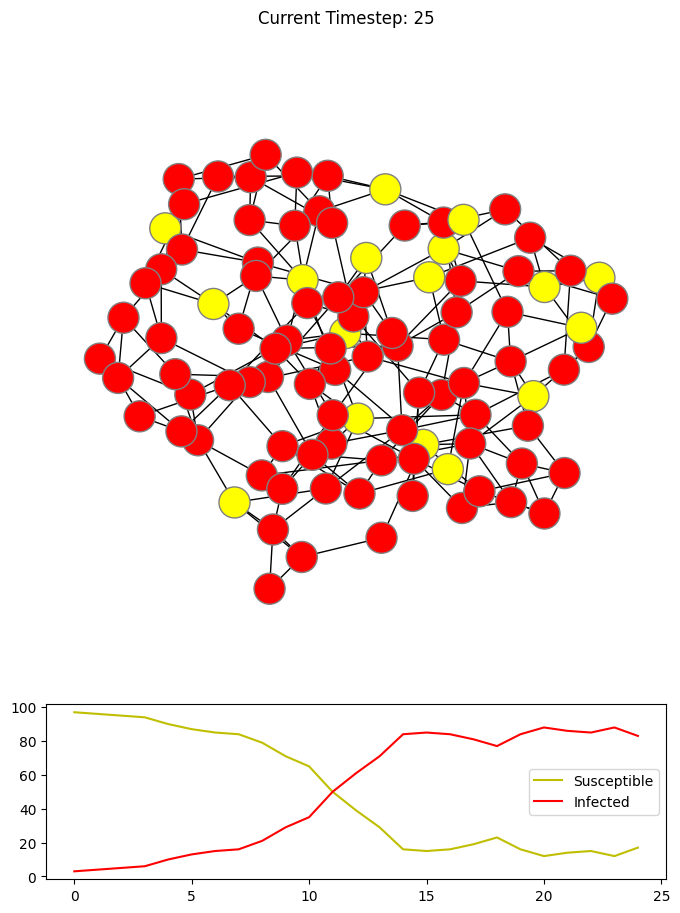

In [80]:
from IPython import display
import time

# Make lists that we can use to store quantities over time for graphing
suscep_data = []
infected_data = []

# How many timesteps do we want to run the model for?
num_runs = 25 # <--

initializeSI() # <-- The function that makes the initial condition goes here (before the loop because we only initialize once)
for current_timestep in range(num_runs): # <--
  updateSI() # <-- update the model based on the rules
  plt.close() # closes the previous visualization before making the new one
  observeSI() # <-- visualize the model using the given observe function

  # As usual, these three lines of code are needed to run the animation
  display.clear_output(wait=True)
  display.display(plt.gcf())
  time.sleep(0.5)

  # Stop the model if nobody's infected
  if infected_data[current_timestep] == 0:
    break

# closes the final plot
plt.close()

**2.D** (1 point) Run the model a few times with the given infection and recovery rates (default for both is 10%). Did the disease die out in within 25 timesteps, did it converge to a (relatively) fixed number of infections (we call this an endemic equilibrium), or did it diverge (uncontrolled growth in infections)?

***Double click*** and write down your response here!

Based on running the model above, we observe that the disease does not die out within 25 timesteps as there are still some infected individuals remaining at the end.

It does not show any uncontrolled growth in infections and the number of infections seems to stay in a certain range in many runs.

It seems to converge to a point where the number of infections remains relatively constant over time. We call this an endemic equilibrium and the rates of infection and recovery are balenced.

The number of infections is not fixed in each run. In some runs, the number might achieve 40-45 nodes. But in other runs, only 25-30 nodes are infected,

**2.E** (3 points) Now, conduct a (very) informal experiment. Change around the infection and recovery rates to see if you can achieve the following:


*   Number of infected agents usually hovers around 80 (endemic equilibrium)
*   Disease usually dies out (no nodes are infected) within 25 timesteps (disease-free equilibrium)

In the text box below, share the parameters that you used to engineer these two outcomes. Then, post screenshots of both. As always, embedded screenshots or cloud links will be accepted.

>*FOR GRADING PURPOSES, RETURN THE MODEL TO ITS DEFAULTS AFTER ANSWERING THIS QUESTION*

***Double click*** to write down your response and post screenshots here!

To get the number of infected agents hovering around 80 (endemic equilibrium), I changed infection probability to 0.25 and recovery probability to 0.1.

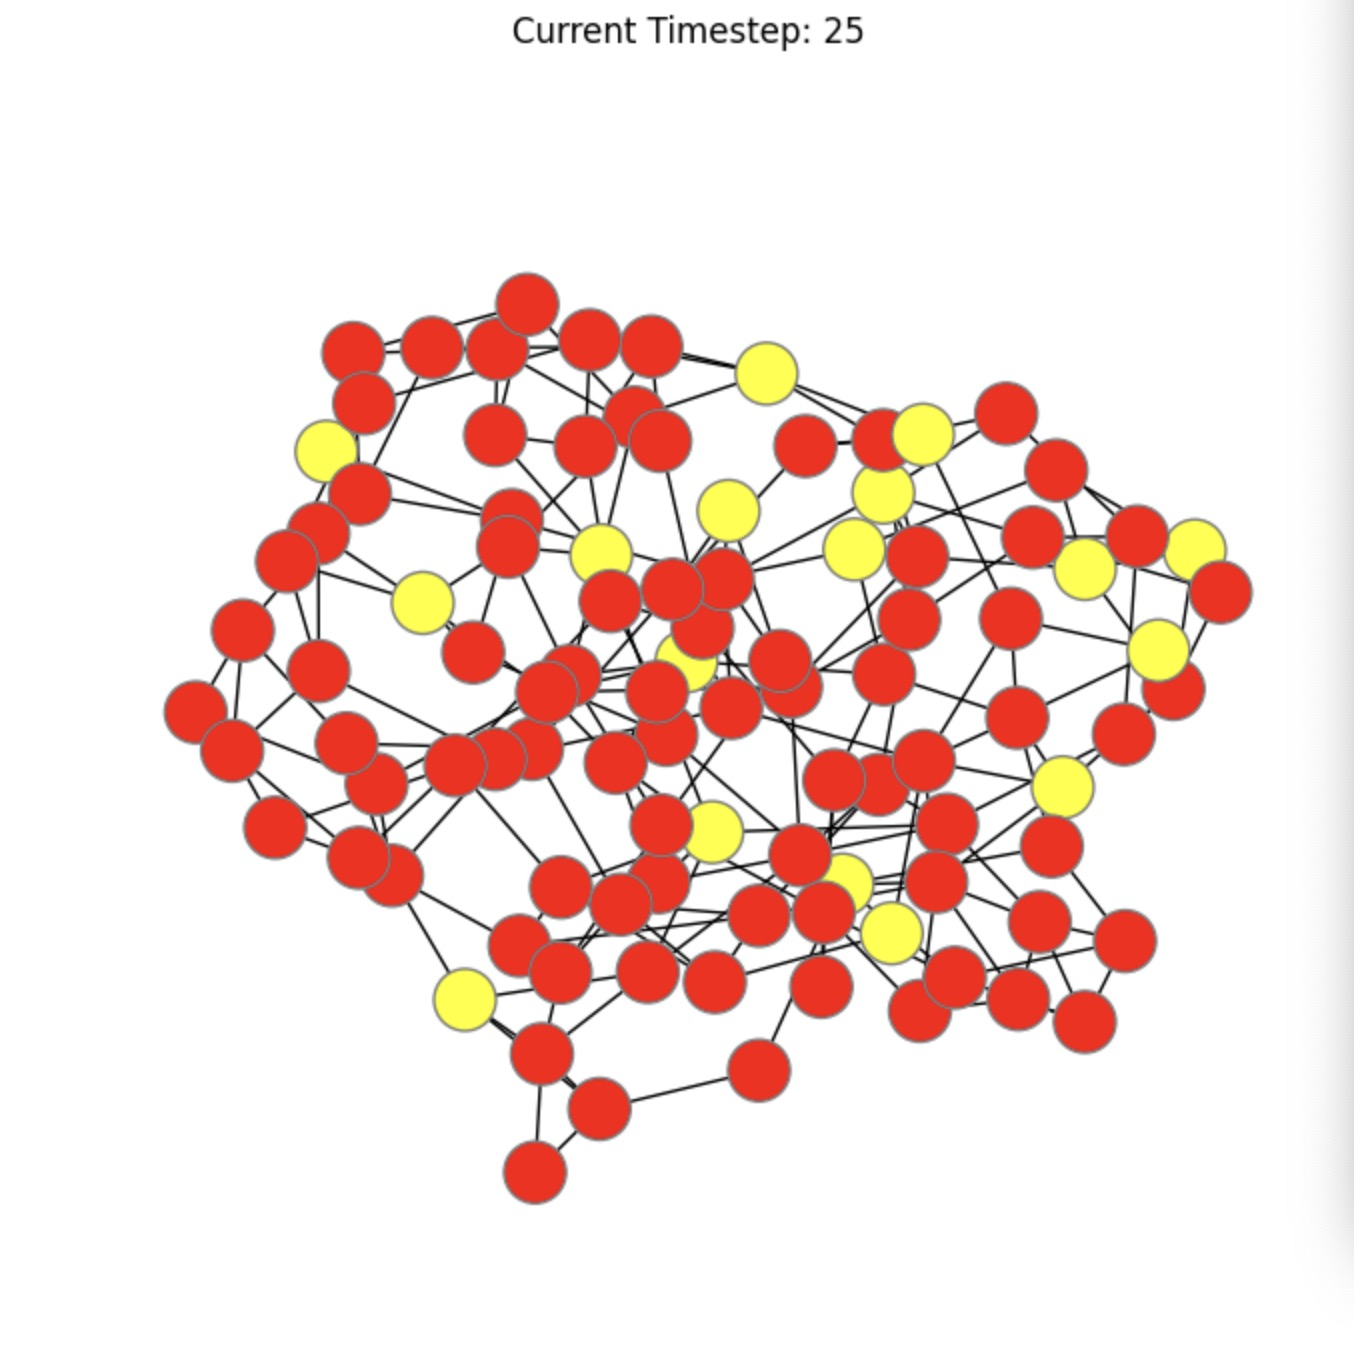

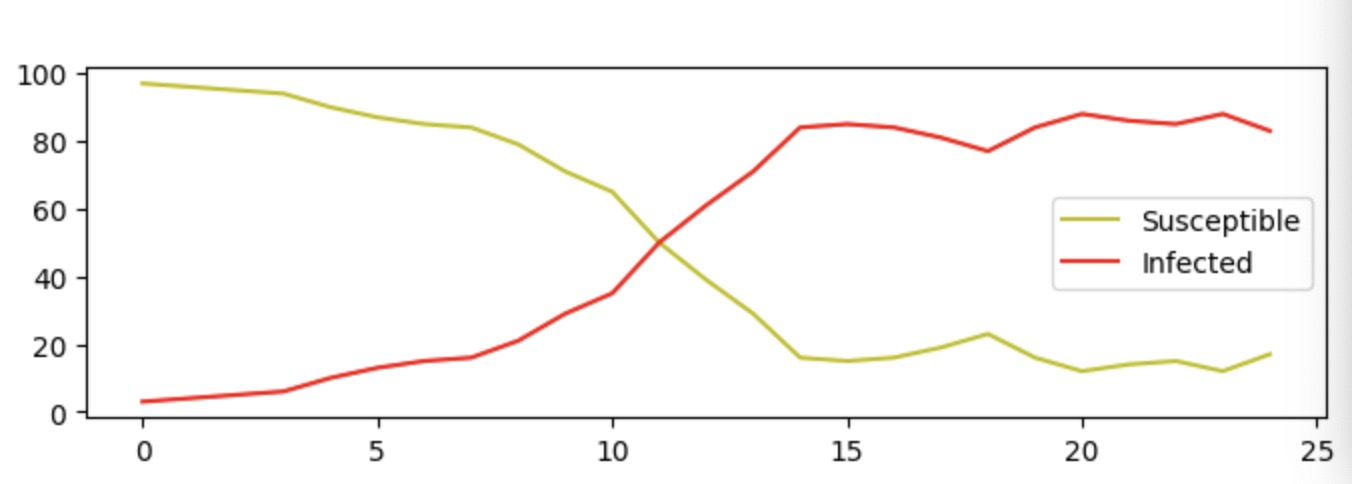



To get disease dying out within 25 timesteps (disease-free equilibrium), I changed infection rate to 0.05 and recovery rate to 0.5.

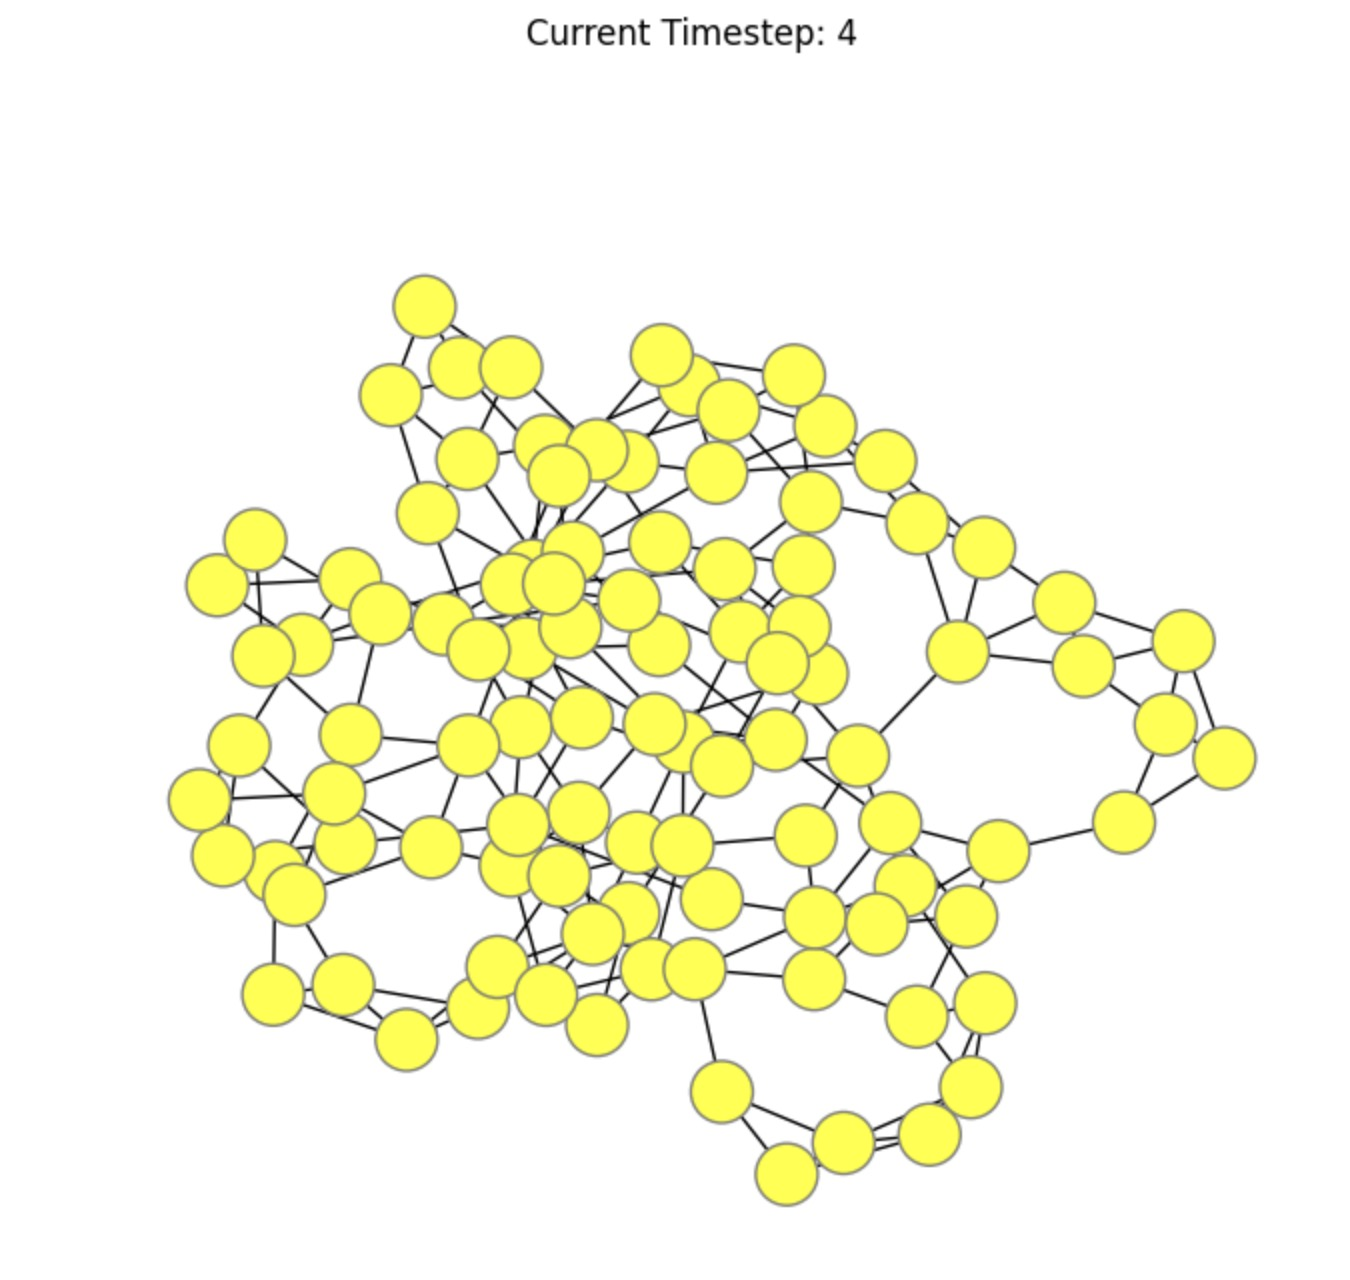

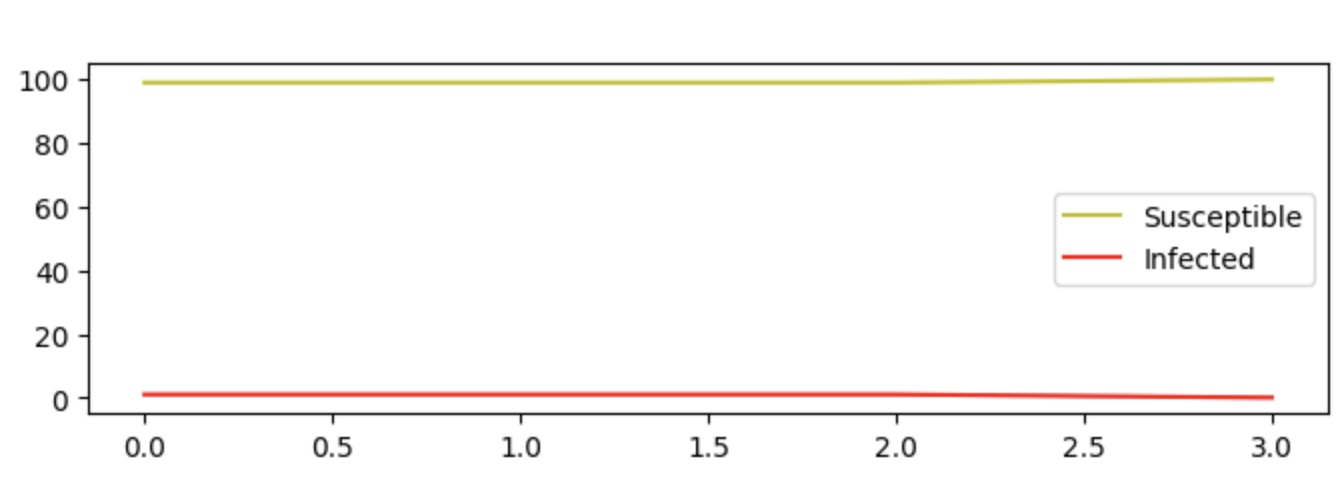

### Problem 3: The SIR Model (13 points)
In problem 3, we'll extend our model to include a third category. This category is usually referred to as "recovered." The "recovered" category consists of nodes that have become immune to the pathogen and can no longer be infected.

It's worth noting that sometimes the "R" category is instead referred to as "removed." The term "removed" refers to agents that have either developed immunity or died from the pathogen.

Regardless of how you choose to interpret the "R" category, the rules of the model remain the same.

**Rules:**

Infected agents have a 10% chance of recovering (entering the "R" category). We'll use 2 to represent a recovered node. Other than that change, all rules from the SI model apply here.

**3.A** (5 points) The codeblocks from the SI model are included again below. Your job is to turn this model into an SIR model. The ```observeSIR()``` function has been completed for you.
>HINT: Implementing this change should only require one minor alteration to the SI model.

Create your initial condition

In [1]:
import networkx as nx

def initializeSIR():
    global current_world, next_world

    num_nodes = 100 # <-- How many nodes?

    # Initialize the current world
    current_world = nx.watts_strogatz_graph(num_nodes, 4, 0.25) # <-- input given parameters to create the watts-strogatz graph
    current_world.pos = nx.kamada_kawai_layout(current_world) # We'll use the kamada-kawai layout because it looks nice

    nx.set_node_attributes(current_world, 0, 'state')  # <-- make a new attribute called state. The default state is susceptible (0)
    current_world.nodes[0]['state'] = 1  # <-- set node 0's state to infected (1)! This will be patient 0.

    # Initalize the next world
    next_world = current_world.copy()
    next_world.pos = current_world.pos

# def initializeSIR():
#     global current_world, next_world

#     num_nodes = 100 # <-- How many nodes?

#     current_world = nx.barabasi_albert_graph(num_nodes, 4)
#     current_world.pos = nx.kamada_kawai_layout(current_world)

#     nx.set_node_attributes(current_world, 0, 'state')
#     current_world.nodes[0]['state'] = 1

#     next_world = current_world.copy()
#     next_world.pos = current_world.pos

Update each agent based on the rules

In [100]:
import random

def updateSIR():
  global current_world, next_world

  next_world = current_world.copy()
  next_world.pos = current_world.pos

  # Loop through all of the nodes
  for current_node in current_world.nodes:

      # Rules for if the current_node is susceptible
      if current_world.nodes[current_node]['state'] == 0: # if susceptible

          # Loop through the neighbors of the susceptible node to see if they're infected
          for neighbor in current_world.neighbors(current_node):

              # For each infected neighbor, the current_node has a 10% chance of infection
              if current_world.nodes[neighbor]['state'] == 1: # <-- if the neighbor is infected
                  # infect the current_agent with a 10% chance
                  if random.random() < 0.1: # <-- infection probability
                      next_world.nodes[current_node]['state'] = 1 # <-- infect the current_agent

                      # If the current node already got infected, we don't need to loop through the neighbors anymore (break the loop)
                      break

      # Rules for if the current_node is infected
      elif current_world.nodes[current_node]['state'] == 1: # <-- if infected
          if random.random() < 0.1: # <-- Recovery probability
            next_world.nodes[current_node]['state'] = 2 # <-- current_agent enters the recovered state

  # Set current_world to next_world to iterate one timestep
  current_world = next_world.copy()
  current_world.pos = next_world.pos

Visualize the model (completed already)

In [101]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Make a custom colormap. We'll use "yellow" for susceptible (0) and "red" for infected (1). Recall that you must pass the colors as strings.
colorMap = ListedColormap(["yellow", "red", "grey"])

def observeSIR():
    global current_world, next_world

    # Count the number of susceptible and infected agents at this timestep
    suscep_count = 0
    infected_count = 0
    recovered_count = 0

    # Make a list of states so we can set the color
    state_list = []

    for current_node in current_world.nodes:
      # Get the state of the current node
      current_node_state = current_world.nodes[current_node]['state']

      # Add it to the list of states
      state_list.append(current_node_state)

      # Count the quantities (S, I, and R)
      if current_node_state == 0:
        suscep_count += 1
      elif current_node_state == 1:
        infected_count += 1
      else:
        recovered_count += 1

    # Maintain the data list
    suscep_data.append(suscep_count)
    infected_data.append(infected_count)
    recovered_data.append(recovered_count)

    # Make subplots, this allows us to plot two things at once (height ratio of 3 to 1)
    fig, axes = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]})
    ax = axes.flatten()

    # Just like in matplotlib, we can use vmin and vmax to set our colors based on our given set of states (in this case 0 and 1 are the only states)
    nx.draw(current_world, cmap = colorMap, vmin = 0, vmax = 2, node_color = state_list, pos = current_world.pos, node_size = 500, edgecolors = "grey", ax = ax[0])
    # the first plot goes in axis 0
    ax[0].set_axis_off()

    # plot the quantities, second plot goes in axis 1
    ax[1].plot(suscep_data[:num_runs],label = 'Susceptible', color ='y')
    ax[1].plot(infected_data[:num_runs],label = 'Infected', color ='red')
    ax[1].plot(recovered_data[:num_runs],label = 'Removed', color ='grey')
    ax[1].legend()

    # Makes the plot bigger
    fig.set_figwidth(8)
    fig.set_figheight(10)

    # Place the current timestep in the title, start counting at 1
    fig.suptitle("Current Timestep: " + str(current_timestep + 1))

Run the model! Be careful about copying and pasting here because you need to retain the ```recovered_data``` list if you want your line graph to work properly.

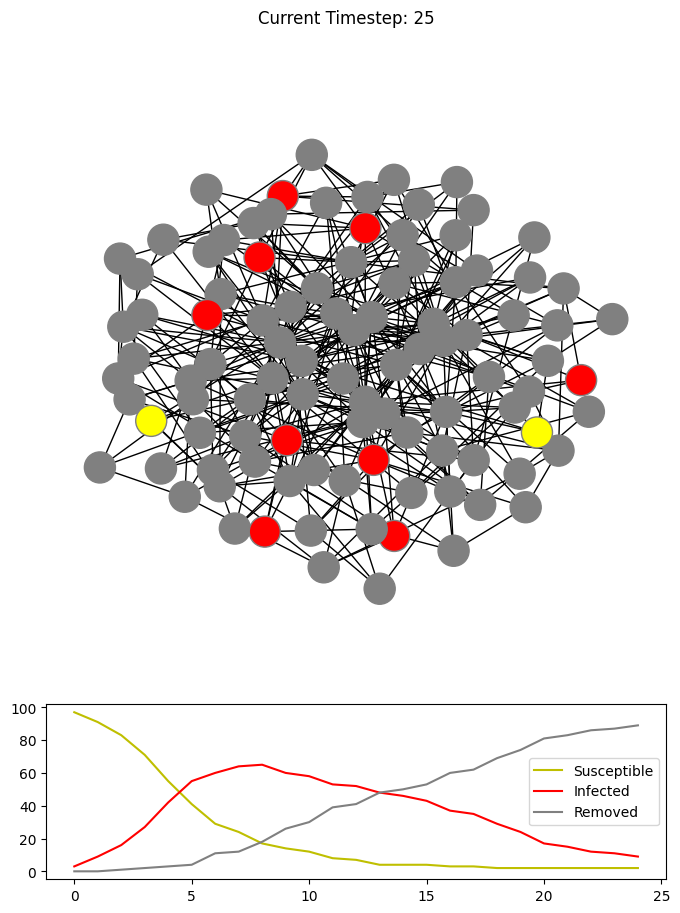

In [102]:
from IPython import display
import time

# Make lists that we can use to store quantities over time for graphing
suscep_data = []
infected_data = []
recovered_data = []

# How many timesteps do we want to run the model for?
num_runs = 25 # <--

initializeSIR() # <-- The function that makes the initial condition goes here (before the loop because we only initialize once)
for current_timestep in range(num_runs): # <--
  updateSIR() # <-- update the model based on the rules
  plt.close() # closes the previous visualization before making the new one
  observeSIR() # <-- visualize the model using the given observe function

  # As usual, these three lines of code are needed to run the animation
  display.clear_output(wait=True)
  display.display(plt.gcf())
  time.sleep(0.5)

  # Stop the model if nobody's infected
  if infected_data[current_timestep] == 0:
    break

# closes the final plot
plt.close()

**3.B** (3 points) Conduct another informal experiment. Change around the infection and recovery rates to see if you can achieve the following:


*   All agents have been infected AND have recovered within 25 timesteps
*   All agents have been infected within 25 timesteps but not all have recovered
*   Disease dies out before all nodes become infected (only susceptible and removed remain)

In the text box below, share the parameters that you used to engineer these three outcomes. Then, post screenshots of all three. As always, embedded screenshots or cloud links will be accepted.

>*FOR GRADING PURPOSES, RETURN THE MODEL TO ITS DEFAULTS AFTER ANSWERING THIS QUESTION*

***Double click*** to write down your response and post screenshots here!

To achieve that all agents have been infected and have recovered within 25 timesteps, I changed both of infection probability and recovery probability to 0.8.  

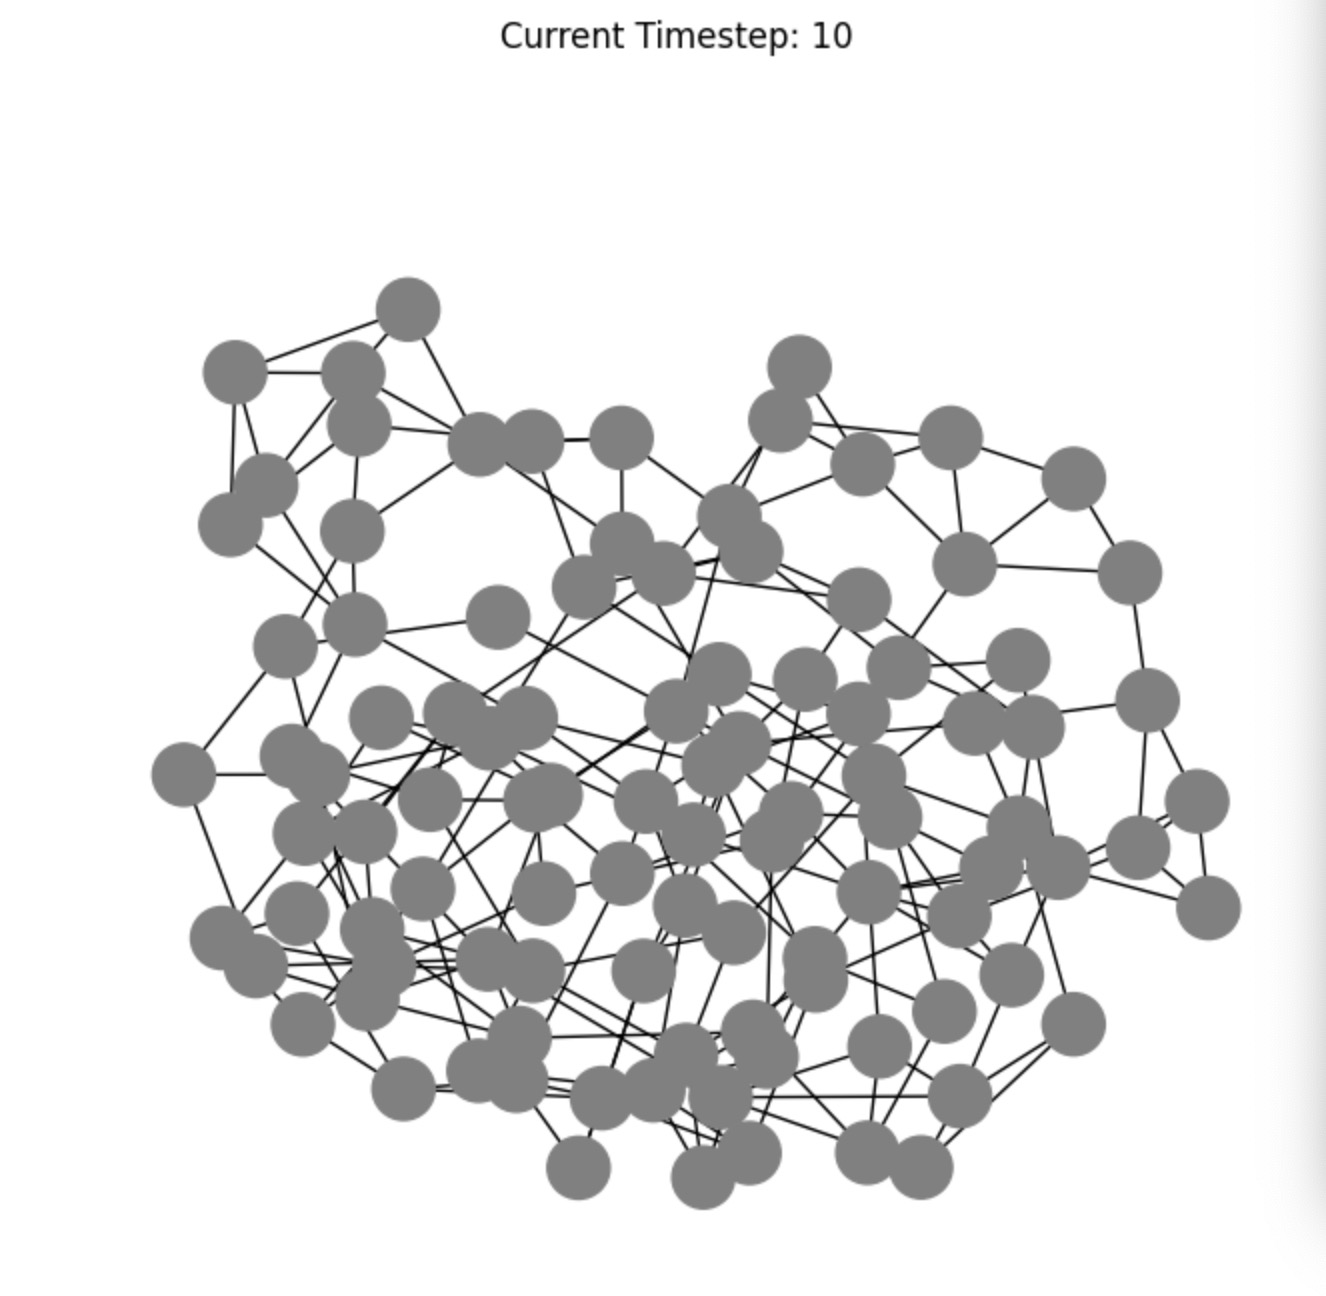

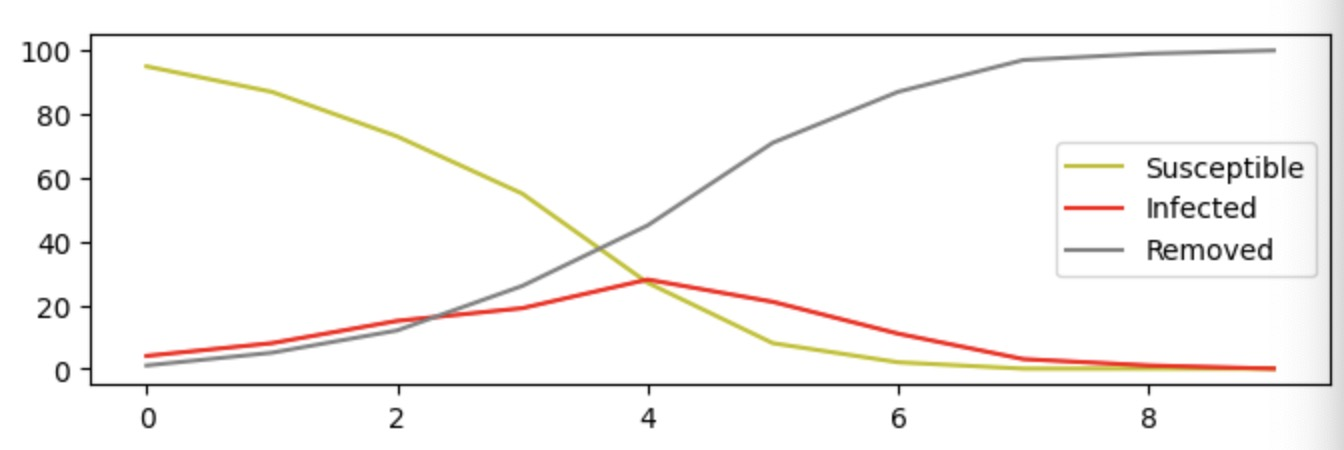

To achieve that all agents have been infected within 25 timesteps but not all have recovered, I changed infection probability to 0.5 and kept the recovery probability the same as 0.1.

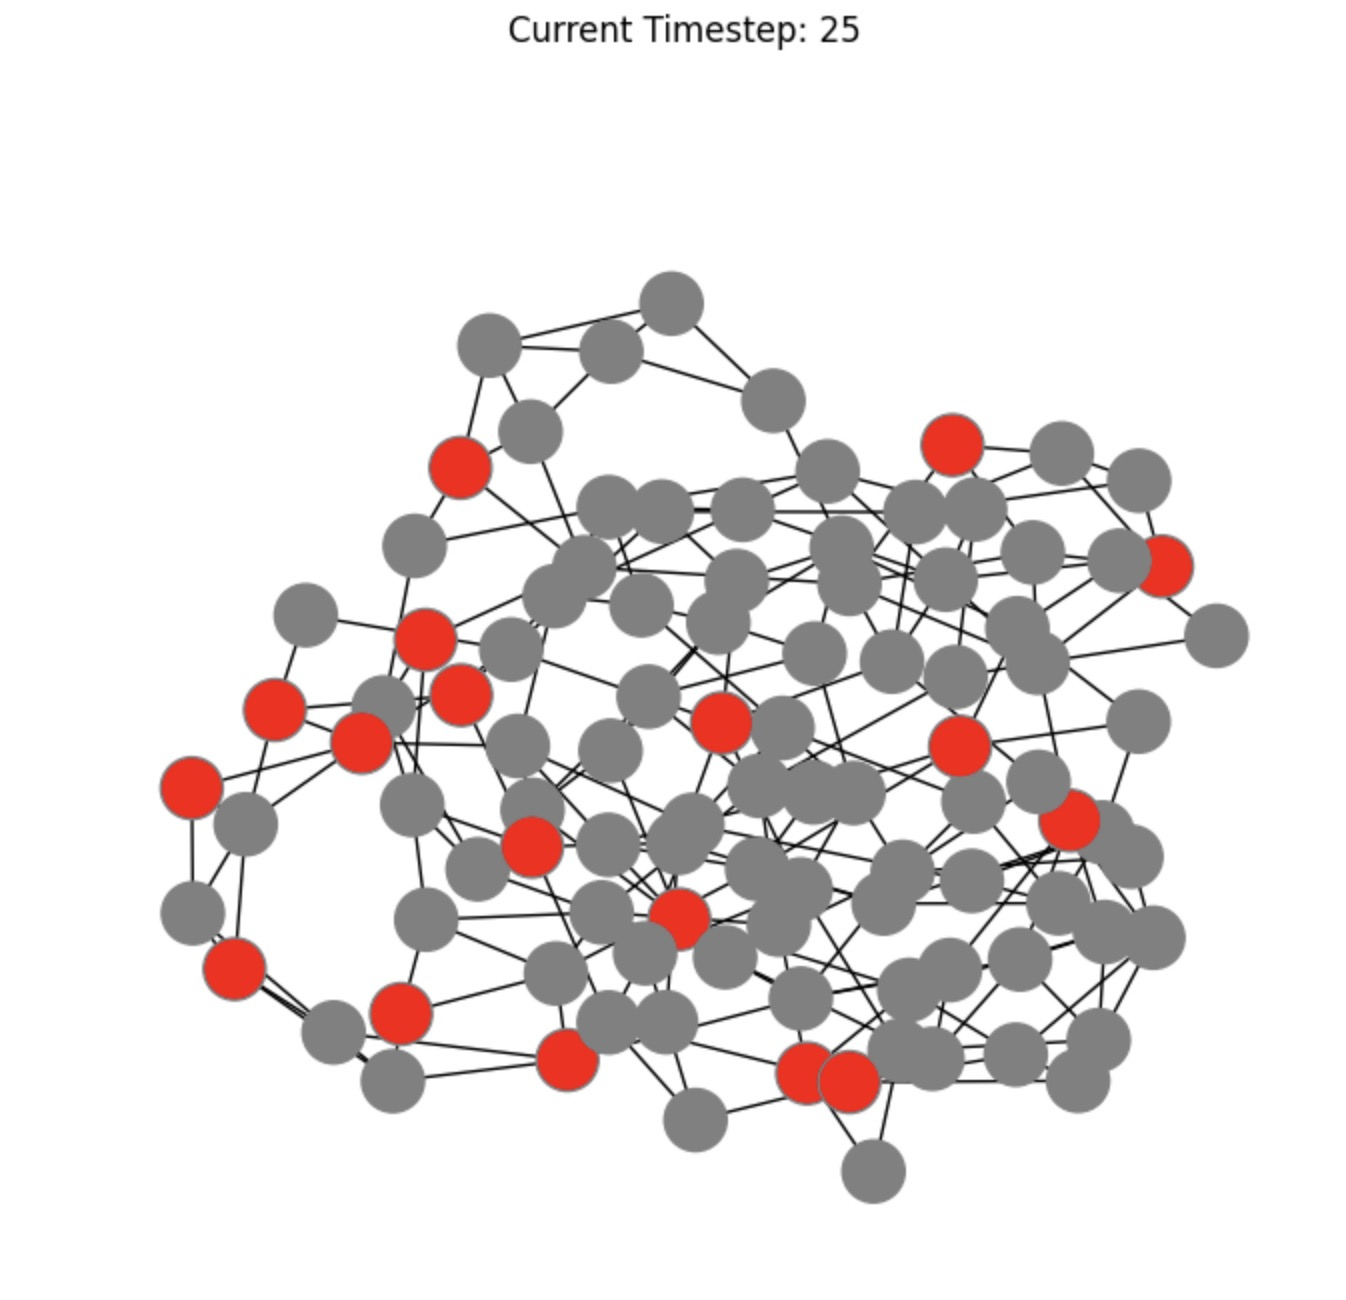
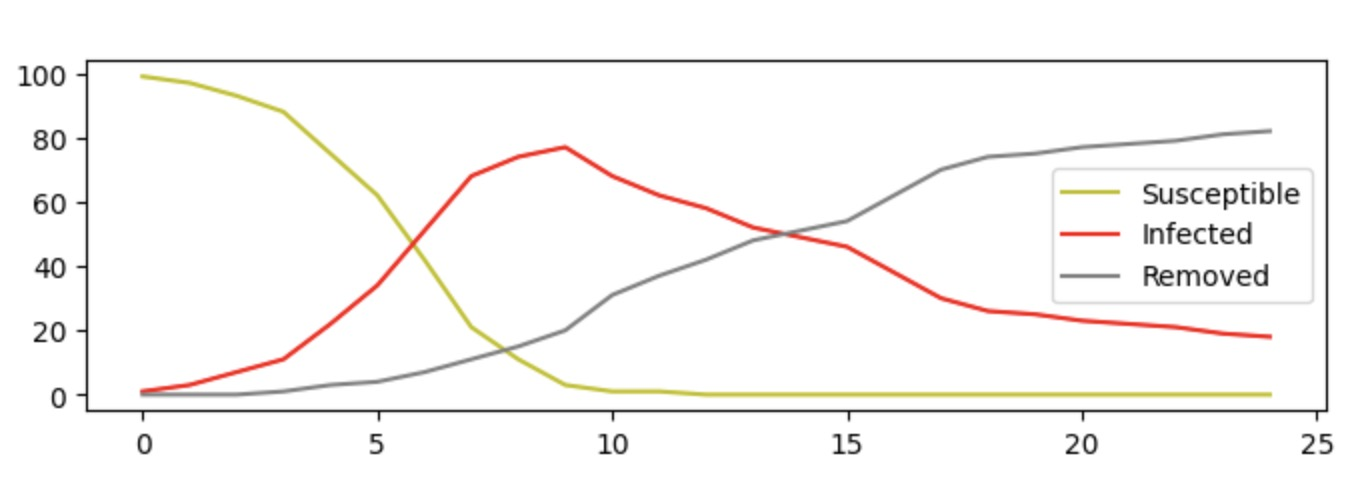

To achieve that disease dies out before all nodes become infected (only susceptible and removed remain), I changed the infection probability to 0.01 and recovery probability to 0.5.

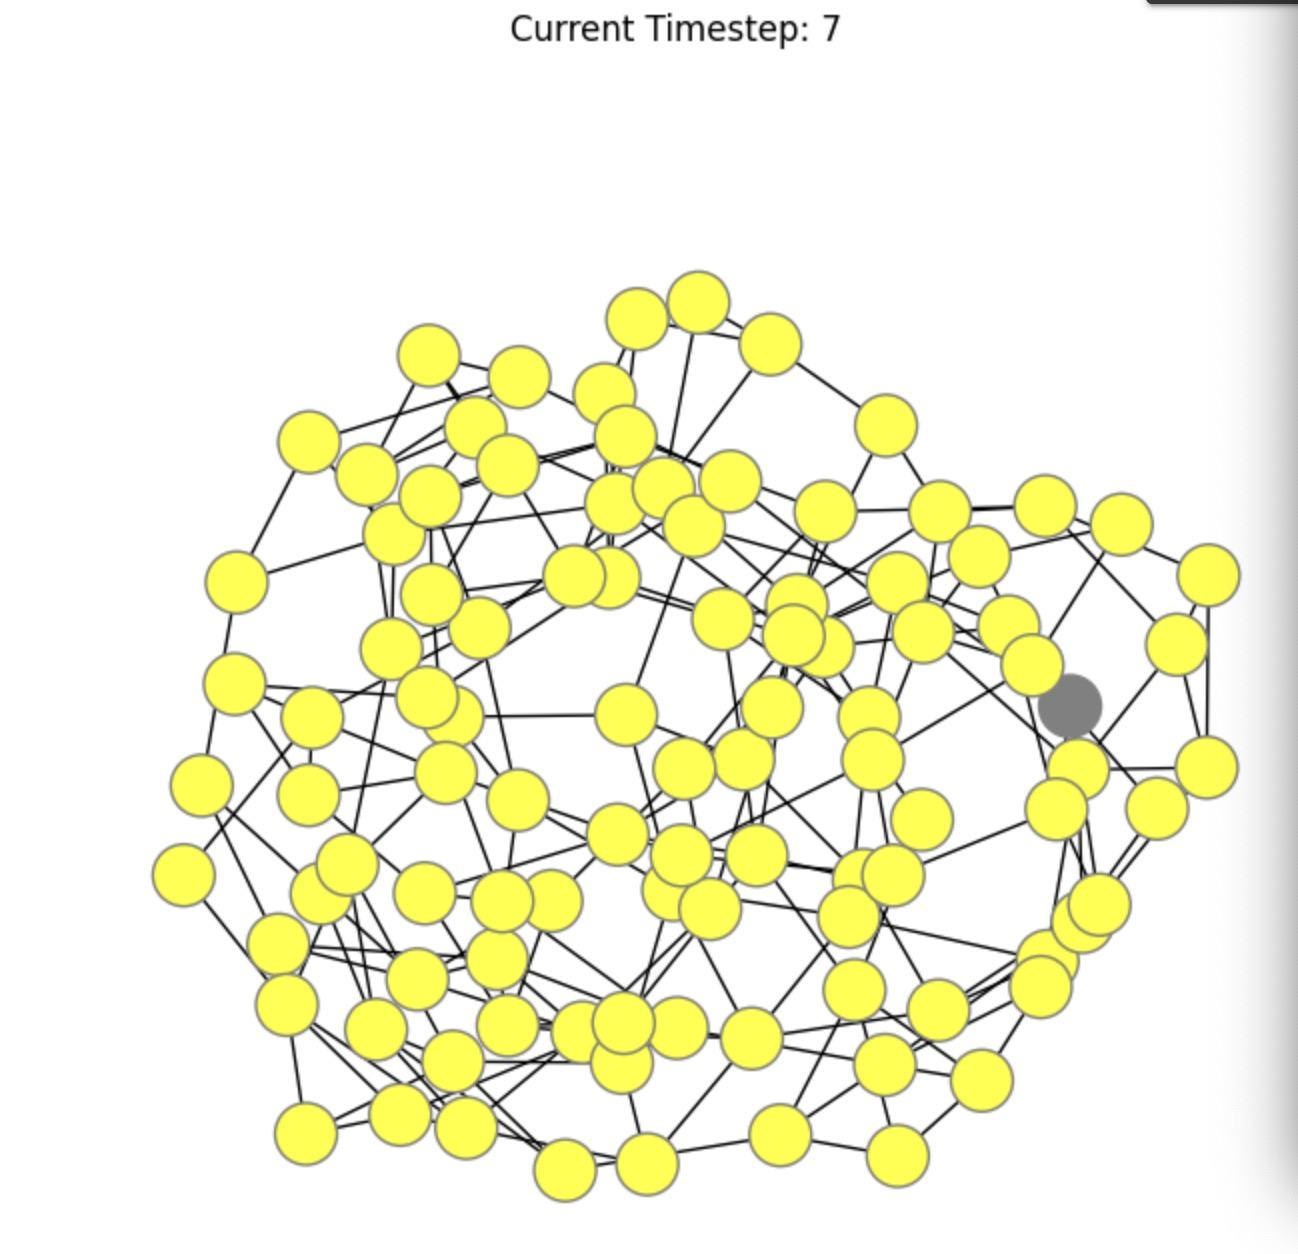
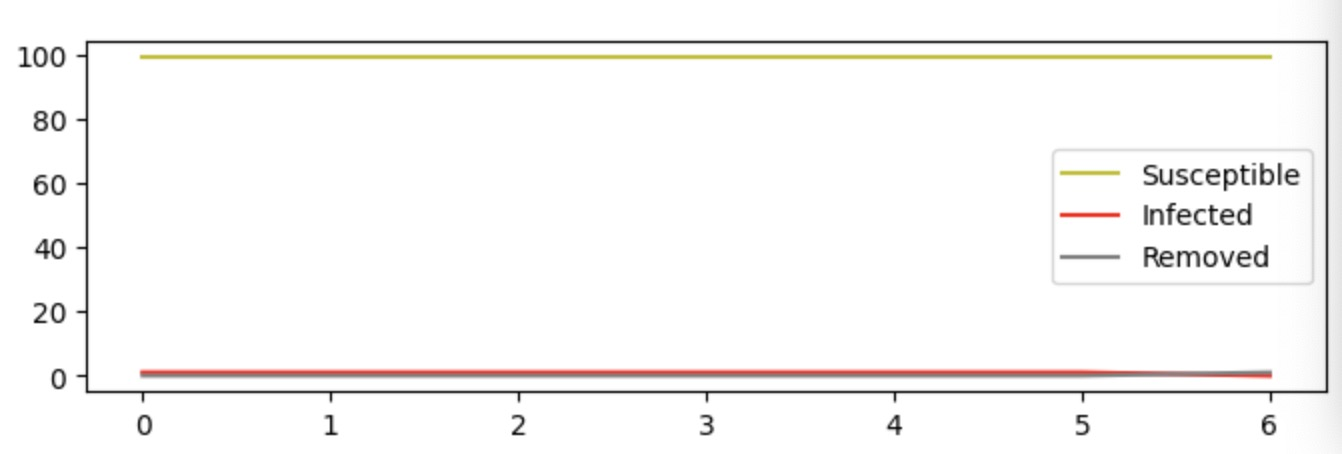

**3.C** (2 points) Now that you've conducted a few informal tests, your goal is to design a formal experiment using the SIR agent-based model. The goal of your formal experiment is to narrow down which parameter values are likely to result in which outcomes.

In plain language below,

*  Design a relevant parameter-sweep experiment of your choice
*  Describe this experiment in detail: include what specific numerical values you plan to test, whether you plan to implement repeat trials, and any data visualizations you plan to generate
*  Justify your experiment: Why do you feel that conducting this experiment is a scientifically worthwhile exercise?
> HINT: For an example of a parameter-sweep experiment, review Lab 4, Problem 4

***Double click*** and write down your response here!

We will systematically vary the infection rate and recovery rate of the disease in our SIR model. The aim is to observe the resulting epidemic dynamics and understand the relationship between the infection rate, recovery rate, and the magnitude of an outbreak. We will vary the infection rate and recovery rate from 0.1 to 0.9 in increments of 0.1 for a total of 9*9=81 distinct runs of the model. We will run 10 trials for each parameter combination. We can simulate for 25 timesteps per trial.

Each heatmap cell would be colored according to the average number of infections at the end of the trials for that parameter combination.

Conducting this experiment is a scientifically worthwhile exercise because it provides a more comprehensive picture of how infection and recovery rates combine to impact disease spread and epidemic outcomes. It helps with predicting the real world outbreaks of epidemic based on the estimated infection rates.


**3.D** (3 points) Now, switch your network to a Basabasi-Albert graph with 100 nodes and 4 initial connections. The easiest way to do this is to comment out the existing Watts-Strogatz network initialization and make a new line that initializes ```current_world``` as a Barabasi-Albert. Remember to restore the default parameter values before answering this question.

Observe what happens, and include a screenshot. Then, answer the following:
* Does the speed of infection change? Does it spread faster or slower?
* What about the network's topology makes this true?
* Of these two networks, which do you think provides more realism for an epidemiology model? Why?

>*FOR GRADING PURPOSES, RETURN THE MODEL TO ITS DEFAULTS AFTER ANSWERING THIS QUESTION*

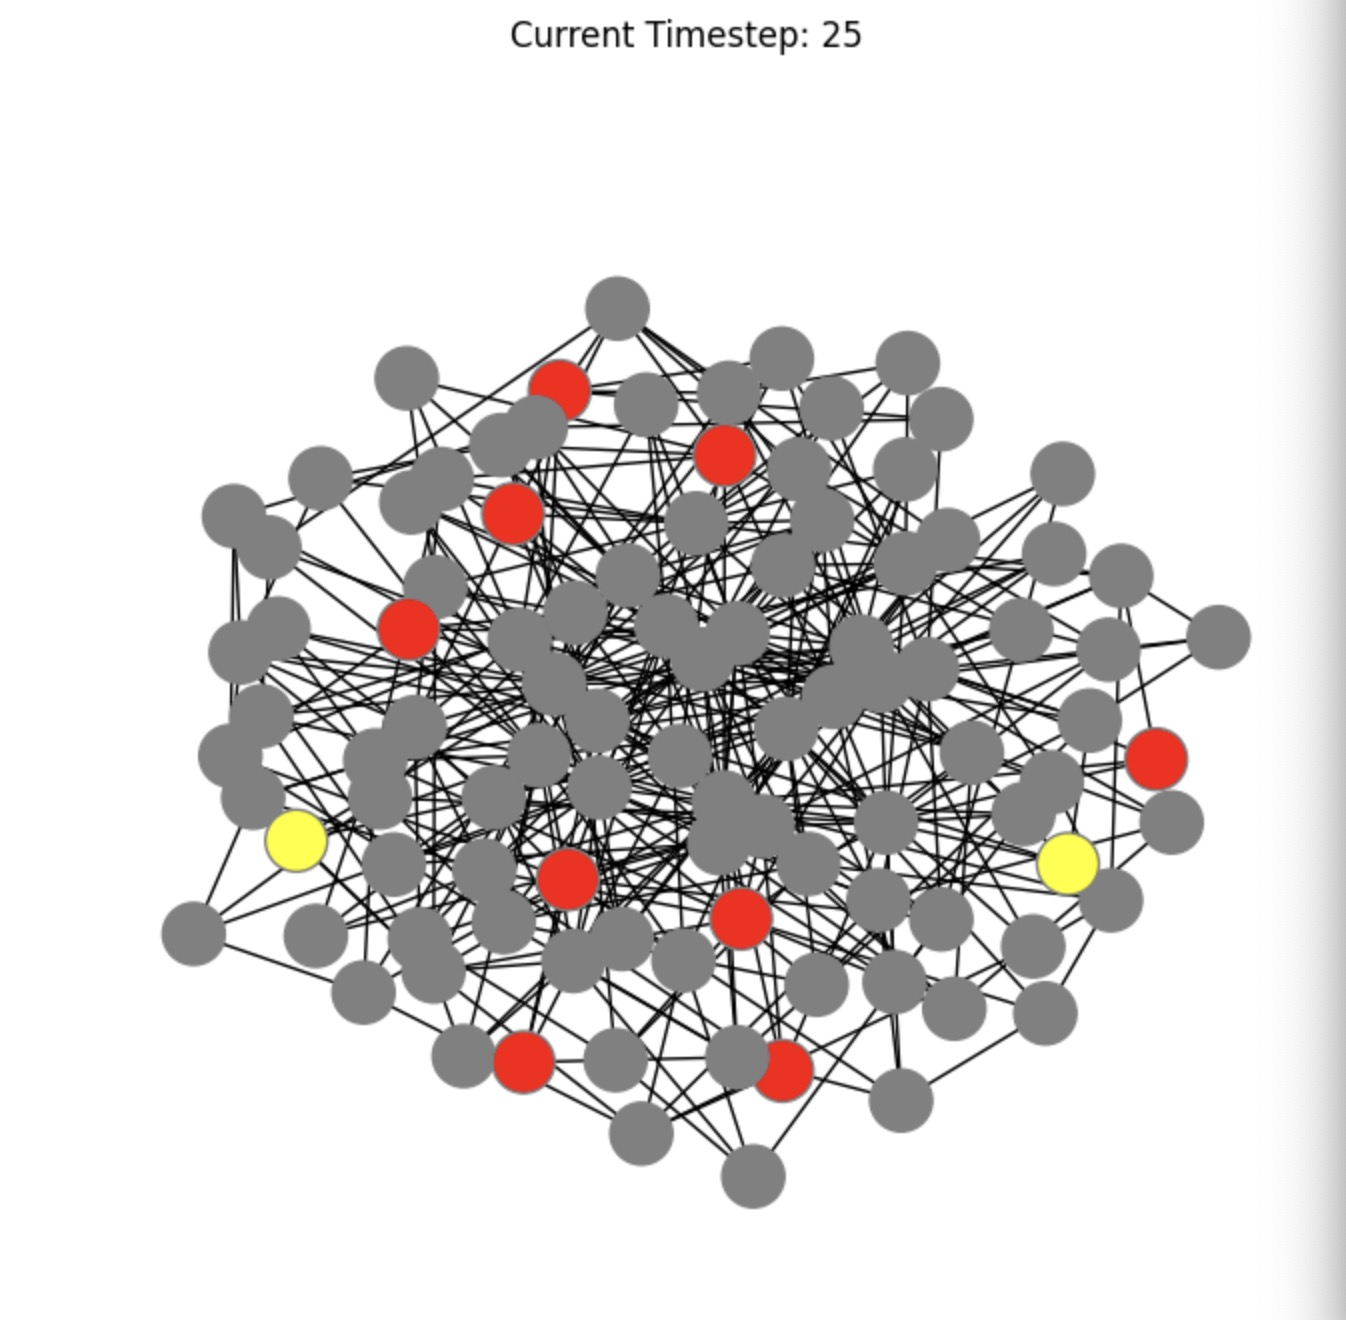

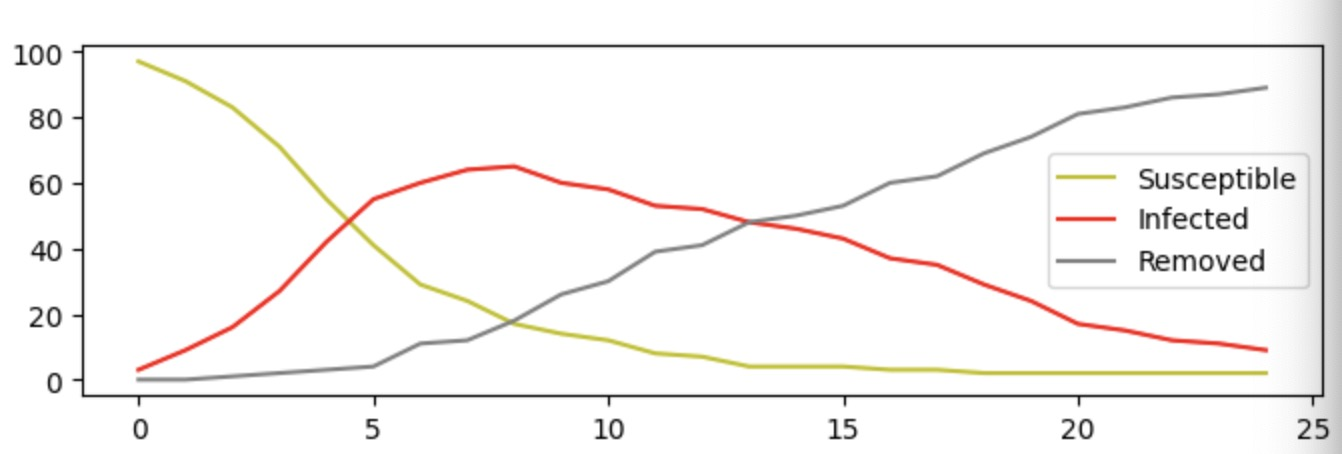

***Double click*** to write down your response and post screenshots here!

The speed of infection is faster than Watts-Strogatz network.

The network's topology of Barabas-Albert are characterized by a few hubs with many more connections than others. The scale free nature means that once a hub gets infected, it can spread the infection to a large portion of the network.

Of these two networks, I think Watts-Strogatz model are more realistic for an epidemiology model. In real world, most people do not interact with hundreds or thousands of others. So Watts-Strogats model with an average number of neighbors seems more reflective in spreading desease.

However, in some specific cases such as viruses that can be transmitted through air,  water, or means other than direct contact, spreading within population includes high degree nodes. Then Barabasi-Albert model will be more appropriate.

## Conceptual Question
### Problem 4: Sidestroke (15 points)
You may be tired of answering these types of questions by now, but it's still good to go through the process so you can continue to brainstorm ideas for the upcoming final project.

**4.A** (3 points) Come up with a process for which a network may be useful in understanding the process's dynamics (something other than disease spread). Then, do the following:


*   Describe this process
*   Explain why you think a network would be useful for modeling this process. For your model, why does a network work better than other choices we've seen (CA, non-CA grid, free-moving, hybrid)?
*   In your network model, what do nodes represent? What do edges represent?

***Double click*** and write down your response here!

We can consider the process of how fake information spreads on social media. When an individual sees false information on social media, there is some chance that they believe it is true and share it with their followers. Each of their followers might also believe it is true and share the story of their own followers. Understanding the dynamics of information propagation offers insights into how fake news can quickly spread on the internet, how fake information is transferred, and how social media networks perform.  

A network may be useful for modeling this process because a network enables more realistic simulations of information spreading. Some might be hubs of information as celebrities have more followers than others. This heterogeneity is better represented in a network than in other choices such as grids in CA. Information sharing on the internet isn't limited to neighboring friends. People from different parts of the world can see the information if they follow the same person. People with the same interests might see the same types of news. They might be influenced by a specific domain of fake information frequently. These clusters or communities are naturally represented in networks.

In my network model, nodes represent users in social media and edges represent follower connections and relationships between users.


**4.B** (4 points) If you don't have perfect data on what your network looks like, you'll need to generate a network. However, if you feel you do have good data on what your network looks like, you can simply run your dynamics on that. Give some thought to whether you'll need to generate a network, then answer ONE of the following:

*   If you don't have precise data on your network structure, what type of network would you generate to simulate your process (random, small-world, scale-free, tree, for more see Lecture 9, Slides 16-22)? What about your process makes this a good choice?

—OR—

*   If you're confident that your connectivity data represents the underlying network well, discuss how your data was/could be collected and why you're confident it reflects the actual structure. Also, do you expect your network to look like any of the types we've discussed in class (random, small-world, scale-free, tree, for more see Lecture 9, Slides 16-22)? If so, which one?

***Double click*** and write down your response here!

I do not have perfect and precise data on my network structure and I would generate a scale-free network to simulate the connections on social media.

In social media communities, there are often some celebrities and influencers who are more respected and popular and might have much more followers than others. These people will have very high-degree hub nodes. This feature is characterized by scale-free networks.

The scale-free network follows a power law distribution. The preferential attachment shows how influential users get more followers over time in a scale-free network. Fake news and information tend to flow through these hubs on social media network, making this structure an important element in the dynamics of information propagation. A scale-free network makes the simulations of spreading more accurate in the real world.

**4.C** (4 points) In plain English (i.e. not coding speak), describe the rules that your model would follow by answering the following questions:

*   Is your network structure fixed so that dynamics only run on top of it, or are nodes/edges added or deleted as the model runs? (dynamics *ON* a network vs. dynamics *OF* a network)
*   How do agents update in each timestep? If your model includes agents of different types, detail the rules for each type

***Double click*** and write down your response here!

The network's structure is mostly fixed, meaning that the current social media network is relatively stable over short periods. The network's major dynamics run on top of it and nodes or edges are not added or deleted as the model runs. Our model will focus on how fake news spreads among accounts within the current network.

There are 3 types of status for each agent.

Agents 0 are those who have not yet believed the shared information.

Agents 1 are those who have encountered the shared information and believe it is true.

Agents 2 are those who have been exposed to the shared information but no longer believe it.

At each timestep, agent 0 has a chance of being exposed to false information if there are connections between agent 1 and this agent. If Agent 0 follows Agent 1, this individual might also become Agent 1.

For each agent 1, there are some chances that they will share this information with their followers. We might also include the recovery rate in this model, which represents the probability that agent 1 will no longer actively spread the news to their followers (probability that the state changes to agent 2).

We will repeat these procedures for the next timestep to see the change of dynamics over time.

**4.D** (4 points) When you make a model with parameters, it's always useful to run an experiment to try and understand how those parameters affect the system.

*   Come up with some parameters in your model that you could change to conduct an experiment.
*   Describe this experiment in detail: include what specific numerical values you plan to test, whether you plan to implement repeat trials, and any data visualizations you plan to generate
*   Justify your experiment: Why do you feel that conducting this experiment is a scientifically worthwhile exercise?
*   Do you expect your model to oscillate, settle to a fixed state, or would it depend on parameters?

***Double click*** and write down your response here!

Assuming that there are 200 agents at the beginning. We can first set the agents who have not yet believed the shared information to 0 (suppose 150 for the initial condition) and set the agents who have been exposed to the shared information and believe it is true to 1 (suppose 50 for the initial condition).

Later on, the agent will be set to 2 if they have been exposed to the shared information but no longer believe it.

At each timestep, if Agent 0 currently encounters the fake news (there is an edge between Agent 0 and Agent 1), there is a 10% probability that they will become Agent 1.

For agent 1 (those who believe the fake news), there is a 15% chance they will share this news with their followers.

For those who have been exposed to the shared information and believe it (agent 1), there is a 10% recovery probability, meaning that they realize that the information is false and will no longer actively share this information with others. In other words, there is a 10% probability they will turn to agent 2.

We will repeat this procedure for 50 timestamps.  

To further understand how those parameters affect the system, we can modify the probability of a user sharing a piece of fake news and the probability of agent 0 believing fake news if exposed. While setting the recovery rate to be constant at all times, we can vary the other two rates from 0.1 to 0.9, resulting in a combination of 9*9=81 trials. We will record the total number of believers at the end of each run, each run having 50 timesteps.
Then we will conduct three repeated trials for each combination and use a heatmap to visualize the belief levels for each combination.  

Conducting this experiment is a scientifically worthwhile exercise because we will have a better understanding of how social media plays out in spreading information. It helps us explore how user behaviors affect information propagation. Policymakers can come up with better strategies to counteract the rapid spread of misinformation.

I expect the model to settle to a fixed state of believers or non-believers at the end.
As long as an individual continues to believe the fake news, they won't recover with any certainty. The number of believers can only grow or stay constant throughout the whole process. Also, there are no methods for believers to spontaneously change back to state 0. Therefore, the model should be stable with a certain split between believers and non-believers.

For example, if the rate of Agent 1 sharing fake news is really high and the rate of Agent 0 believing fake news is also high, in the end the model might settle to a fixed state that all agents have been infected and recovered. On the other hand, if the rate of Agent 1 sharing fake news is low and the rate of Agent 0 believing fake news is really low, the fake news might die out within 50 timesteps.




## Super Fun and Entertaining Surveys
### Problem 5: [Final Project Interest Form](https://forms.office.com/Pages/ResponsePage.aspx?id=tHdu5iRX10SHIQbfFgRQzkHEq2QIDytNtuGj8NmENtdUNkVDRUJUVVlJRUxURFFXQ1ZUOTBSNTZZNi4u) (5 points)
It's time to start thinking about your final project. The project can be done in groups or individually. If you'd like to do the project individially, there is a space in the form to indicate this preference.

If you'd like to be paired in a group, you will be asked about what topics you have enjoyed in the class so far, as well as any specific ideas that you may have regarding a project proposal.

**Post a screenshot** of the form completion page below.

***Double click*** and add your screenshot here!

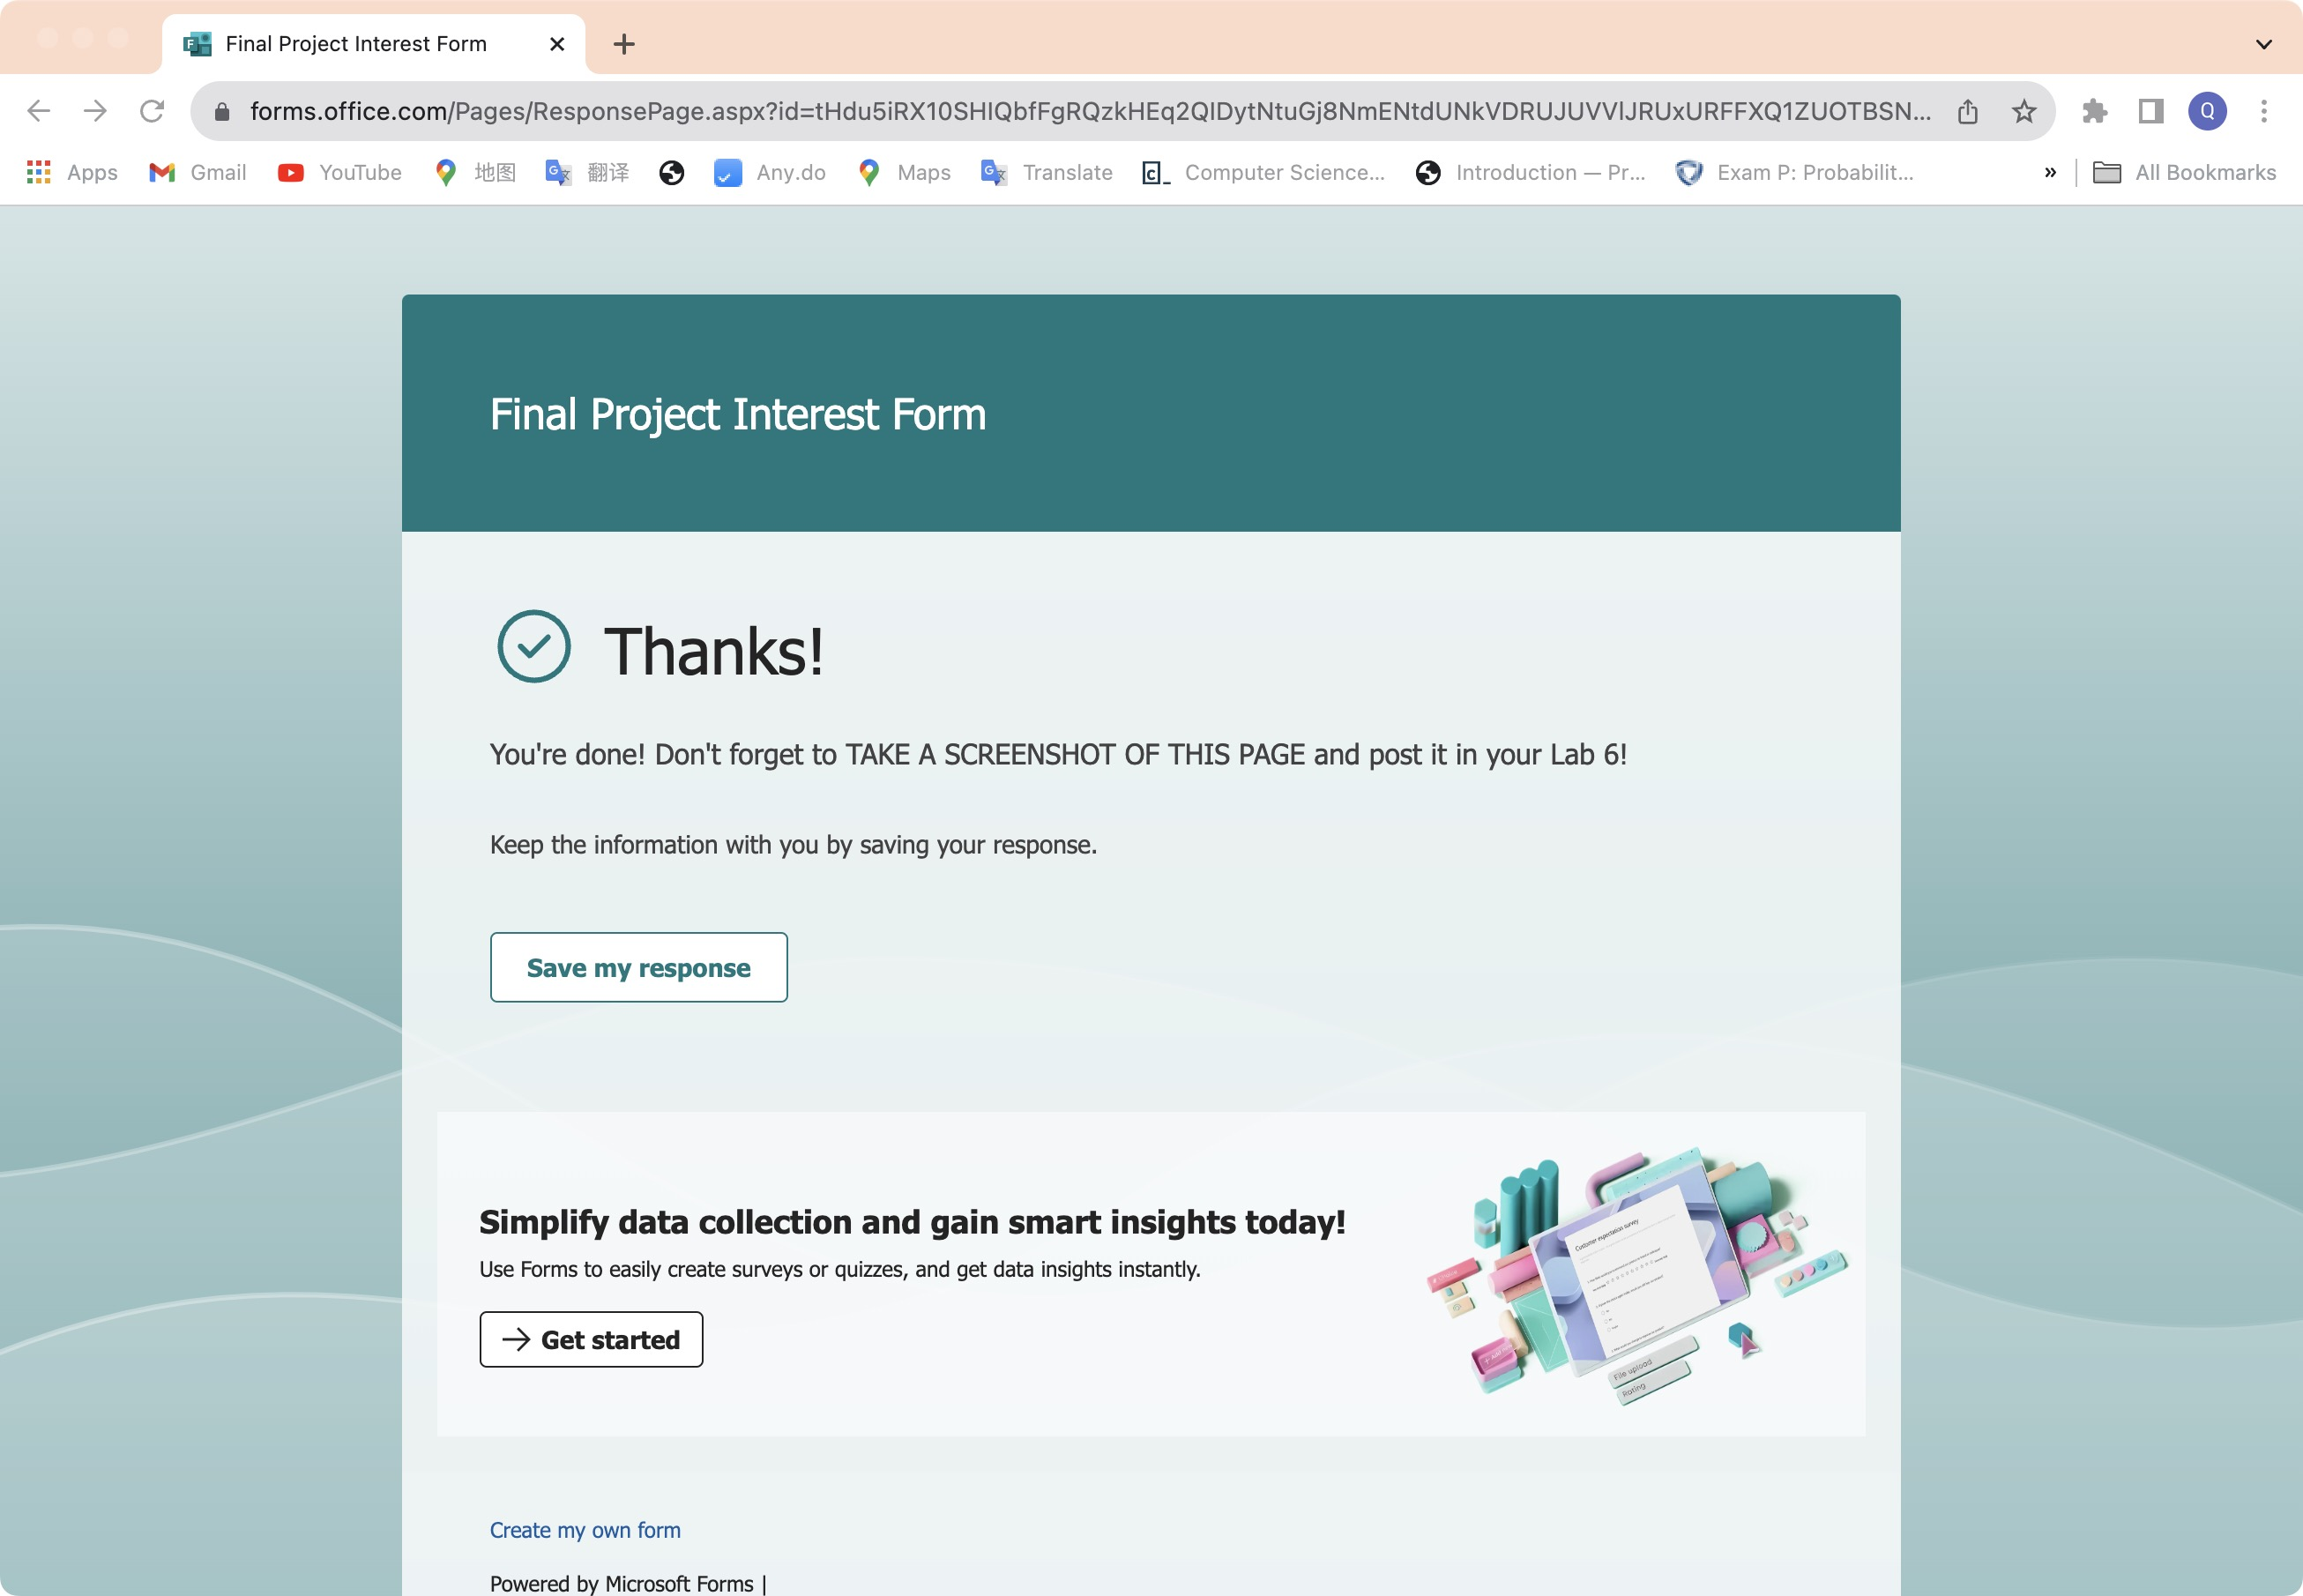

### Problem 6: [Anonymous Course Feedback Form](https://forms.office.com/Pages/ResponsePage.aspx?id=tHdu5iRX10SHIQbfFgRQzkHEq2QIDytNtuGj8NmENtdUMzBPQ1RIWTZaUEk3UTlFSk1LODBWVzFFVy4u) (4 extra credit points)
Your feedback is invaluable to us as we enter the second half of the semester. We want to know what has worked, and especially what hasn't, so we can work to improve your experience in the class.

The anonymous course feedback form is linked above, and will take you 15-20 minutes to complete. Please be as honest as possible! If that means absolutely tearing us to shreds, so be it. We want to know what you really think.

Note that unlike the attendance forms, this form does not require sign-in and it does not record your account information. It is truly anonymous.

**If the response rate for this anonymous form reaches 80%, everyone in the class will recieve the 4 extra credit points** for this problem. Otherwise, nobody will recieve the points.